In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import warnings 
import logging 


In [2]:
df = pd.read_csv("/kaggle/input/tmdb-after-kpi/tmdb_after_kpi.csv")
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,profit,roi,is_franchise
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.0
mean,192258.444444,213.777778,1691.831828,20425.666667,7.396389,14.721217,138.055556,0.0,0.0,1478.054050,8.174878,1.0
std,132476.949284,61.959717,521.062285,7743.039842,0.508506,9.366180,23.848720,0.0,0.0,488.689283,2.123386,0.0
min,597.000000,125.000000,1243.225667,10072.000000,6.537000,6.066100,102.000000,0.0,0.0,1032.698830,4.442329,1.0
25%,102257.000000,162.500000,1334.901927,13984.000000,7.126500,8.810175,125.250000,0.0,0.0,1142.833299,6.772569,1.0
50%,175033.500000,200.000000,1484.541738,20613.000000,7.285500,9.934250,135.500000,0.0,0.0,1301.249495,7.888409,1.0
75%,299535.500000,243.000000,1957.195640,25853.000000,7.798000,18.318150,147.500000,0.0,0.0,1694.695640,9.392116,1.0
max,420818.000000,356.000000,2923.706026,34238.000000,8.238000,41.588200,194.000000,0.0,0.0,2686.706026,12.336312,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18 non-null     int64  
 1   title                  18 non-null     object 
 2   tagline                18 non-null     object 
 3   release_date           18 non-null     object 
 4   genres                 18 non-null     object 
 5   belongs_to_collection  18 non-null     object 
 6   original_language      18 non-null     object 
 7   budget_musd            18 non-null     float64
 8   revenue_musd           18 non-null     float64
 9   production_companies   18 non-null     object 
 10  production_countries   18 non-null     object 
 11  vote_count             18 non-null     int64  
 12  vote_average           18 non-null     float64
 13  popularity             18 non-null     float64
 14  runtime                18 non-null     int64  
 15  overview

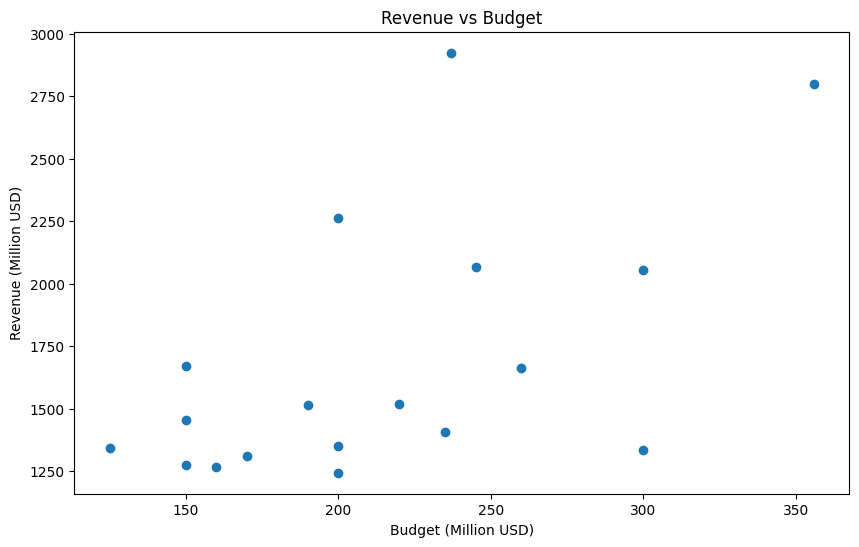

In [4]:
import matplotlib.pyplot as plt
import importlib
import matplotlib

# reload pyplot to restore anything overwritten
importlib.reload(matplotlib.pyplot)

plt.figure(figsize=(10,6))
plt.scatter(df['budget_musd'], df['revenue_musd'])
plt.xlabel("Budget (Million USD)")
plt.ylabel("Revenue (Million USD)")
plt.title("Revenue vs Budget")
plt.savefig('revenue_budget.png')
plt.show()


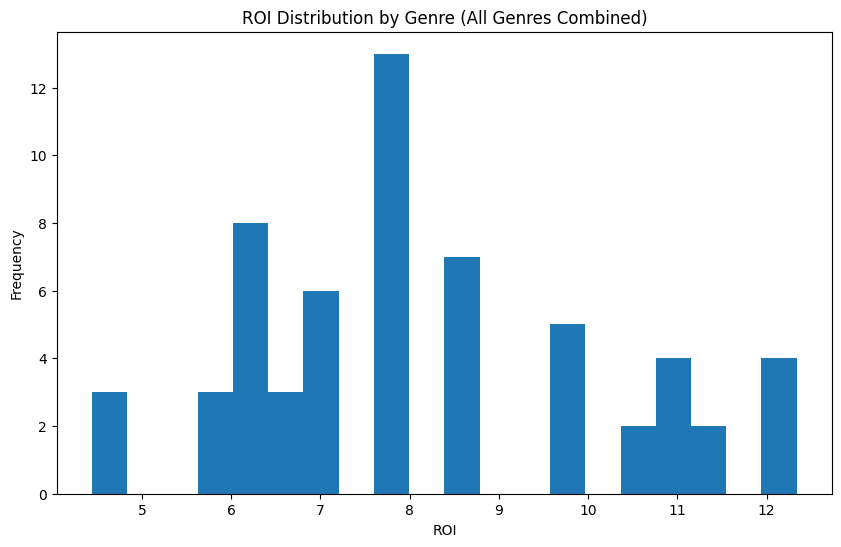

In [5]:

#roi distribution by genre
genre_df = df.assign(genre=df['genres'].str.split('|')).explode('genre')

plt.figure(figsize=(10,6))
plt.hist(genre_df['roi'], bins=20)
plt.title("ROI Distribution by Genre (All Genres Combined)")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.savefig('genre_distribution.png')
plt.show()


<Figure size 1200x600 with 0 Axes>

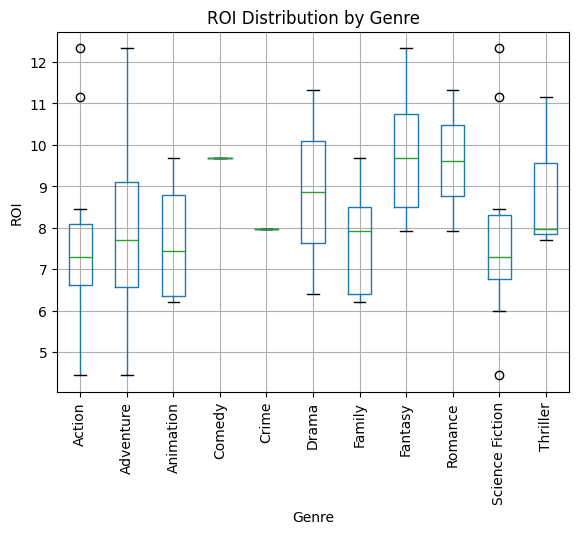

In [6]:
plt.figure(figsize=(12,6))
genre_df.boxplot(column='roi', by='genre', rot=90)
plt.title("ROI Distribution by Genre")
plt.suptitle("")
plt.xlabel("Genre")
plt.ylabel("ROI")
plt.savefig('genre_boxplot.png')
plt.show()


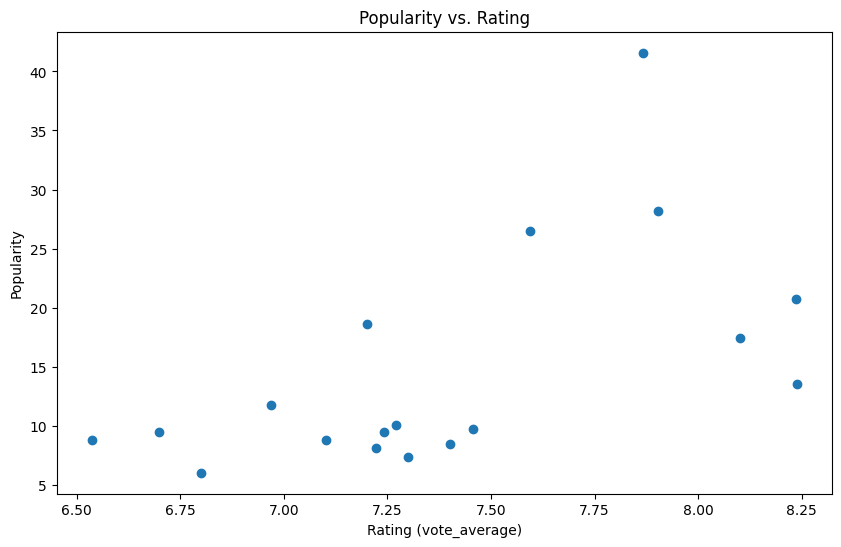

In [7]:
#popularity vs rating 
plt.figure(figsize=(10,6))
plt.scatter(df['vote_average'], df['popularity'])
plt.xlabel("Rating (vote_average)")
plt.ylabel("Popularity")
plt.title("Popularity vs. Rating")
plt.savefig('popularity-vs-rating.png')
plt.show()


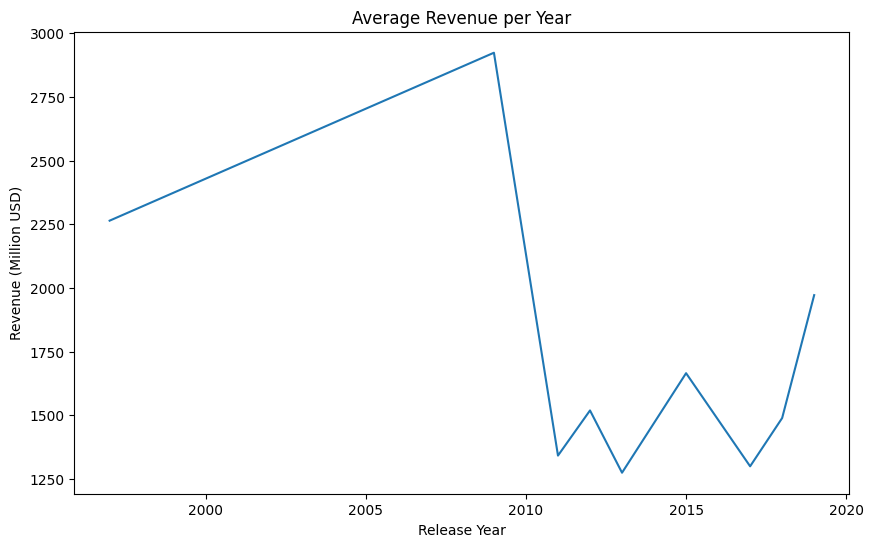

In [8]:
#yearly trends in box performance 
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
yearly = df.groupby('release_year')['revenue_musd'].mean()
plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly.values)
plt.title("Average Revenue per Year")
plt.xlabel("Release Year")
plt.ylabel("Revenue (Million USD)")
plt.savefig('revenue_performance.png')
plt.show()


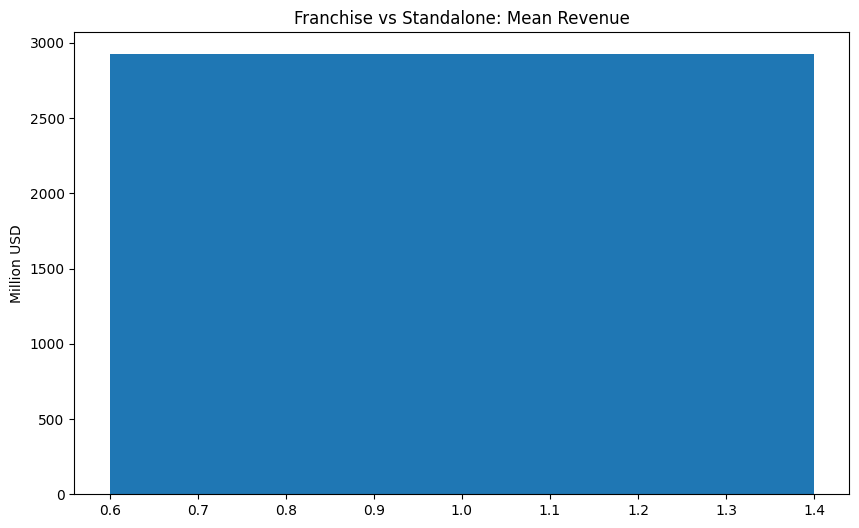

In [9]:
#franchise vs standalone 

plt.figure(figsize=(10,6))
plt.bar(df['is_franchise'], df['revenue_musd'])
plt.title("Franchise vs Standalone: Mean Revenue")
plt.ylabel("Million USD")
plt.savefig('franchise_vs_standalone.png')
plt.show()
